In [108]:
#接受原料种类，时间，供货量,供货商三个特征

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from category_encoders import *
import optuna
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

In [110]:
train = pd.DataFrame()
test = pd.DataFrame()

In [111]:
order = pd.read_csv('orders.csv')
order.drop([402,403], axis=0, inplace=True)
order

,供应商ID,材料分类,W001,W002,W003,W004,W005,W006,W007,W008,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,S001,B,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,S002,A,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,S003,C,7.0,1.0,0.0,0.0,0.0,1.0,4.0,50.0,...,10.0,3.0,50.0,20.0,20.0,7.0,10.0,9.0,20.0,10.0
3,S004,B,0.0,1.0,1.0,100.0,0.0,85.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,S005,A,30.0,60.0,60.0,60.0,70.0,70.0,60.0,70.0,...,80.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,S398,C,0.0,1.0,0.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,S399,B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
399,S400,B,0.0,1.0,0.0,60.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
400,S401,B,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


D:\programs\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

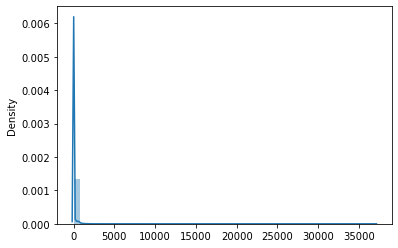

In [112]:
sns.distplot(order.drop(['供应商ID','材料分类'], axis=1))

In [113]:
supply = pd.read_csv('supplyer.csv')
supply


,供应商ID,材料分类,W001,W002,W003,W004,W005,W006,W007,W008,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,S001,B,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,0,0,0
1,S002,A,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,S003,C,8,1,0,0,0,1,5,58,...,9,4,54,20,20,8,18,10,22,11
3,S004,B,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S005,A,37,62,60,65,76,76,65,71,...,84,78,77,79,78,75,74,74,76,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,S398,C,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,S399,B,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399,S400,B,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,S401,B,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
label = np.array(order.drop(['供应商ID','材料分类'], axis=1))
label = label.reshape(96480)
train['Order'] = label

In [115]:
train['Week'] = np.array([range(1,241) for i in range(402)]).flatten()

In [116]:
mat = supply['材料分类']
mat
train['Material'] = np.array([[mat[i] for m in range(240)] for i in range(402)]).flatten()

In [117]:
sup = np.array(supply.drop(['供应商ID','材料分类'], axis=1))
sup = sup.reshape(96480)
train['Supply'] = sup

In [118]:
merc = range(1,403)
merc
train['Merc'] = np.array([[merc[i] for m in range(240)] for i in range(402)]).flatten()

In [119]:
train.head()

,Order,Week,Material,Supply,Merc
0,0.0,1,B,0,1
1,0.0,2,B,0,1
2,0.0,3,B,0,1
3,43.0,4,B,0,1
4,0.0,5,B,0,1


In [120]:
tsa = pd.read_csv('TSA_decided.csv')
tsa = tsa.drop('Unnamed: 0', axis=1)
tsa

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.401721,0.370781,0.233586,0.139244,0.220652,0.436687,0.592722,0.526608,0.271255,0.027249,...,0.015794,-0.000000,0.008759,0.371052,0.761634,0.901655,0.672212,0.218747,-0.000000,-0.000000
1,0.414782,1.265432,1.816501,1.759558,1.570090,1.686395,1.845256,1.508356,0.776682,0.451089,...,0.534423,0.830555,1.661566,1.630474,0.293337,-0.000000,0.231265,3.700975,7.211902,8.064783
2,61.899697,43.435924,23.588269,16.786262,21.829279,24.008876,12.648015,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,1.674301,11.955433,17.889239,24.355185,32.431669,38.272855,36.203632
3,0.414906,0.464102,0.322206,0.140648,0.105548,0.233240,0.344278,0.264546,0.026563,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.061157,0.357538,0.555788,0.486887
4,115.910567,115.847042,114.809586,110.505308,103.741372,98.820588,99.233050,103.610129,106.964122,106.042577,...,105.757151,103.223542,101.881654,104.719871,110.873529,117.211857,122.282869,127.606449,134.941433,143.240480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.860203,1.211462,1.029484,0.429804,-0.000000,-0.000000,0.163244,0.457700,0.402539,0.093450,...,-0.000000,-0.000000,-0.000000,0.225048,0.365746,0.308992,0.154423,0.046453,0.014619,-0.000000
398,0.856800,1.189701,1.028365,0.480546,0.011278,0.004058,0.391031,0.746461,0.731400,0.403513,...,0.057014,0.031393,0.132277,0.313980,0.461814,0.544512,0.622233,0.713883,0.732989,0.603260
399,0.550621,1.349341,1.293377,0.421496,-0.000000,-0.000000,-0.000000,0.089978,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.019661
400,0.943905,1.509697,1.433686,0.820405,0.241623,0.131747,0.371436,0.506010,0.300735,-0.000000,...,-0.000000,-0.000000,0.082438,0.316939,0.349173,0.223999,0.176725,0.312946,0.474026,0.454432


In [121]:
np.array(tsa).shape

(402, 24)

In [122]:
test = pd.DataFrame()

In [123]:
sup = np.array(tsa).flatten()
sup = sup.reshape(9648)
test['Supply'] = sup

In [124]:
test['Week'] = np.array([range(1,25) for i in range(402)]).flatten()
test['Material'] = np.array([[mat[i] for m in range(24)] for i in range(402)]).flatten()
test['Merc'] = np.array([[merc[i] for m in range(24)] for i in range(402)]).flatten()
test

,Supply,Week,Material,Merc
0,0.401721,1,B,1
1,0.370781,2,B,1
2,0.233586,3,B,1
3,0.139244,4,B,1
4,0.220652,5,B,1
...,...,...,...,...
9643,-0.000000,20,B,402
9644,0.023901,21,B,402
9645,-0.000000,22,B,402
9646,-0.000000,23,B,402


In [125]:
train['Material'] = train['Material'].map({'A':1, 'B':2, 'C':3})
test['Material'] = test['Material'].map({'A':1, 'B':2, 'C':3})

In [126]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

D:\programs\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Order', ylabel='Density'>

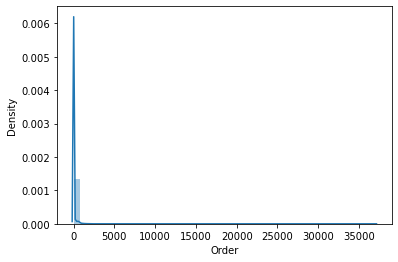

In [127]:
sns.distplot(train['Order'])

In [128]:
train['Order']

0         0.0
1         0.0
2         0.0
3        43.0
4         0.0
         ... 
96475     1.0
96476     0.0
96477     1.0
96478     0.0
96479     0.0
Name: Order, Length: 96480, dtype: float64

----

In [129]:
tsa

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.401721,0.370781,0.233586,0.139244,0.220652,0.436687,0.592722,0.526608,0.271255,0.027249,...,0.015794,-0.000000,0.008759,0.371052,0.761634,0.901655,0.672212,0.218747,-0.000000,-0.000000
1,0.414782,1.265432,1.816501,1.759558,1.570090,1.686395,1.845256,1.508356,0.776682,0.451089,...,0.534423,0.830555,1.661566,1.630474,0.293337,-0.000000,0.231265,3.700975,7.211902,8.064783
2,61.899697,43.435924,23.588269,16.786262,21.829279,24.008876,12.648015,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,1.674301,11.955433,17.889239,24.355185,32.431669,38.272855,36.203632
3,0.414906,0.464102,0.322206,0.140648,0.105548,0.233240,0.344278,0.264546,0.026563,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.061157,0.357538,0.555788,0.486887
4,115.910567,115.847042,114.809586,110.505308,103.741372,98.820588,99.233050,103.610129,106.964122,106.042577,...,105.757151,103.223542,101.881654,104.719871,110.873529,117.211857,122.282869,127.606449,134.941433,143.240480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.860203,1.211462,1.029484,0.429804,-0.000000,-0.000000,0.163244,0.457700,0.402539,0.093450,...,-0.000000,-0.000000,-0.000000,0.225048,0.365746,0.308992,0.154423,0.046453,0.014619,-0.000000
398,0.856800,1.189701,1.028365,0.480546,0.011278,0.004058,0.391031,0.746461,0.731400,0.403513,...,0.057014,0.031393,0.132277,0.313980,0.461814,0.544512,0.622233,0.713883,0.732989,0.603260
399,0.550621,1.349341,1.293377,0.421496,-0.000000,-0.000000,-0.000000,0.089978,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.019661
400,0.943905,1.509697,1.433686,0.820405,0.241623,0.131747,0.371436,0.506010,0.300735,-0.000000,...,-0.000000,-0.000000,0.082438,0.316939,0.349173,0.223999,0.176725,0.312946,0.474026,0.454432


In [130]:
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [131]:
df_train

,Order,Week,Material,Supply,Merc
0,0.0,1,2,0,1
1,0.0,2,2,0,1
2,0.0,3,2,0,1
3,43.0,4,2,0,1
4,0.0,5,2,0,1
...,...,...,...,...,...
96475,1.0,236,2,0,402
96476,0.0,237,2,0,402
96477,1.0,238,2,0,402
96478,0.0,239,2,0,402


In [132]:
df_test

,Supply,Week,Material,Merc
0,0.401721,1,2,1
1,0.370781,2,2,1
2,0.233586,3,2,1
3,0.139244,4,2,1
4,0.220652,5,2,1
...,...,...,...,...
9643,-0.000000,20,2,402
9644,0.023901,21,2,402
9645,-0.000000,22,2,402
9646,-0.000000,23,2,402


In [133]:


def objective(trial):
    k=10
    accuracy_sum = 0
    for i in range(k):
        data, target = df_train.drop('Order', axis=1), df_train.Order
        train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.2)
        dtrain = lgb.Dataset(train_x, label=train_y)

        param = {
            "metric": "l2",
            "verbosity": -1,
            "boosting_type": "gbdt",

            # 'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 0.9),
            # 'subsample': trial.suggest_float("subsample", 0.6, 0.8),
            'learning_rate': trial.suggest_float("learning_rate", 0.005, 0.05),
            'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
            'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
            "num_leaves": trial.suggest_int("num_leaves", 2, 256),
            "n_estimators": trial.suggest_int("n_estimators", 16, 64),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
            "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
            "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
            'seed': 42
        }

        gbm = lgb.train(param, dtrain)
        preds = gbm.predict(valid_x)
        pred_labels = np.rint(preds)
        accuracy_sum += sklearn.metrics.accuracy_score(valid_y, pred_labels)
    accuracy = accuracy_sum/k
    return accuracy

In [134]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2021-09-12 03:10:46,219] A new study created in memory with name: no-name-c7189468-6f55-4958-ab67-451b6ecb7af8
D:\programs\envs\python36\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\programs\envs\python36\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\programs\envs\python36\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\programs\envs\python36\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will u

In [135]:
print("Besttrial:")
trial=study.best_trial
print("Value:",trial.value)
print("Params:")
for key, value in trial.params.items():
    print("{}:{}".format(key,value))

Besttrial:
Value: 0.00035758706467661696
Params:
learning_rate:0.02611267491211319
lambda_l1:2.2215763718056607
lambda_l2:0.05284822083648191
num_leaves:211
n_estimators:20
feature_fraction:0.6233637112665587
bagging_fraction:0.5419272572158067
bagging_freq:2
min_child_samples:97


In [136]:
def prepare_for_light_gbm(data,id_col,drop_cols,target_col):
    # Drop target column
    if target_col is not None:
        labels = data[target_col]
        drop_cols = drop_cols + [target_col]
    else:
        labels = []

    if id_col is not None:
        ids = data[id_col]
        drop_cols = drop_cols + [id_col]
    else:
        ids = []

    if drop_cols is not None:
        data = data.drop(drop_cols, axis=1)

    # Create LGB mats
    lgb_data = lgb.Dataset(data, label=labels, free_raw_data=False,
                           feature_name=list(data.columns), 
                           categorical_feature='auto')

    return lgb_data, labels, ids, data

train_split_df, valid_split_df = train_test_split(df_train, test_size=0.4)

(train_lgb_dataset, train_labels,
     train_ids, train_split_df) = prepare_for_light_gbm(
        train_split_df,drop_cols=[],id_col=None, target_col='Order')

(valid_lgb_dataset, valid_labels,
     valid_ids, valid_split_df) = prepare_for_light_gbm(
        valid_split_df,drop_cols=[], id_col=None,target_col='Order')

test_lgb_dataset, _, _, test_df = prepare_for_light_gbm(
        df_test,drop_cols=[],id_col=None, target_col=None)

    # Prepare data set using all the training data
(train_valid_lgb_dataset, train_valid_labels,
     _, train_valid_df) = prepare_for_light_gbm(
        df_train,drop_cols=[],id_col=None, target_col='Order')

In [137]:
add = { 
            "metric": "l2",
            "verbosity": -1,
            'objective':'regression',
            "boosting_type": "gbdt"}


In [138]:
best_params = {}
best_params.update(add)
best_params.update(trial.params)
best_params

{'metric': 'l2',
 'verbosity': -1,
 'objective': 'regression',
 'boosting_type': 'gbdt',
 'learning_rate': 0.02611267491211319,
 'lambda_l1': 2.2215763718056607,
 'lambda_l2': 0.05284822083648191,
 'num_leaves': 211,
 'n_estimators': 20,
 'feature_fraction': 0.6233637112665587,
 'bagging_fraction': 0.5419272572158067,
 'bagging_freq': 2,
 'min_child_samples': 97}

Fitting model 0


D:\programs\envs\python36\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


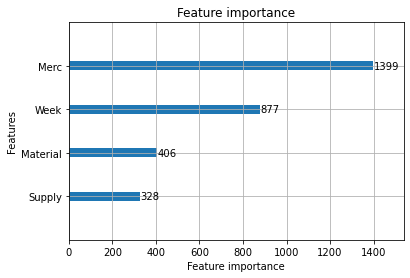

Fitting model 1


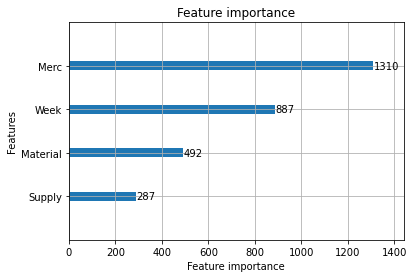

Fitting model 2


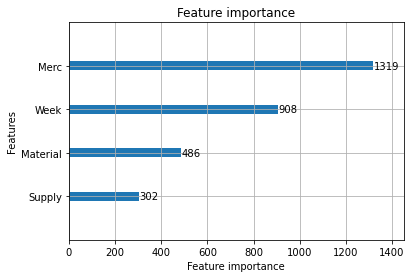

Fitting model 3


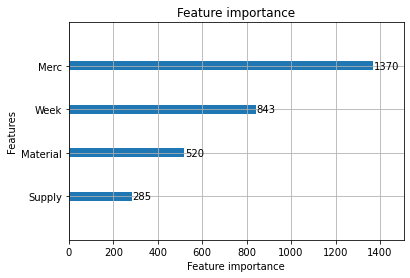

Fitting model 4


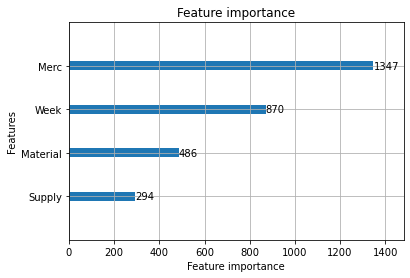

Fitting model 5


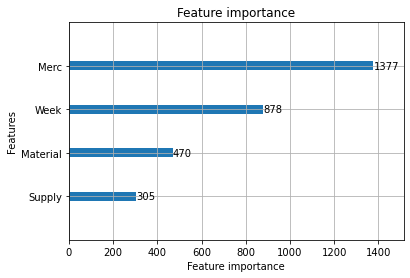

Fitting model 6


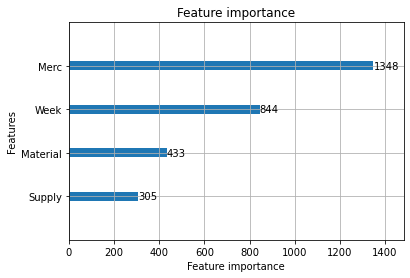

Fitting model 7


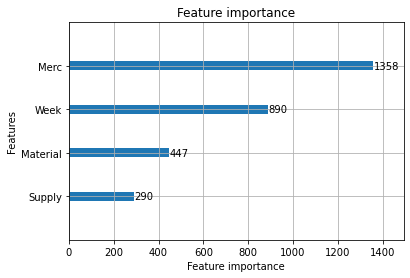

Fitting model 8


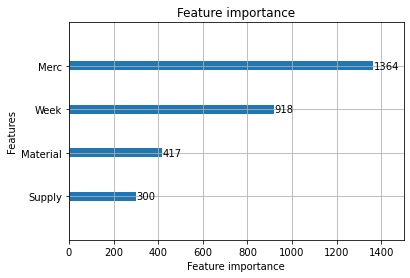

Fitting model 9


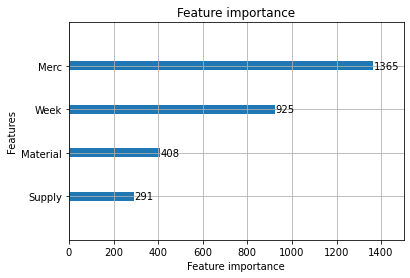

In [139]:
k = 10
valid_preds, train_preds, result = 0, 0, 0
for m in range(k):
    
    print('Fitting model', m)

        # Prepare the data set for fold
    train_split_df, valid_split_df = train_test_split(df_train, test_size=0.2)
    (train_lgb_dataset, train_labels,train_ids, train_split_df) = prepare_for_light_gbm(
            train_split_df, target_col='Order', id_col=None,
            drop_cols=[])
        
    (valid_lgb_dataset, valid_labels,valid_ids, valid_split_df) = prepare_for_light_gbm(
            valid_split_df, target_col='Order', id_col=None,
            drop_cols=[])
        
        # Train
    gbm = lgb.train(best_params, train_lgb_dataset, num_boost_round=10000,
                        valid_sets=[train_lgb_dataset, valid_lgb_dataset],
                        verbose_eval=50)

        # Plot importance
    lgb.plot_importance(gbm)
    plt.show()

        # Predict
    valid_preds += gbm.predict(valid_split_df, 
                                num_iteration=gbm.best_iteration) / k
    train_preds += gbm.predict(train_split_df, 
                                num_iteration=gbm.best_iteration) / k
    result += gbm.predict(df_test, num_iteration=gbm.best_iteration) / k 

In [140]:
df_test1 = df_test.copy()
df_test1['Order_pred'] = result
df_test1.to_csv('pred.csv', index=False)